In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import StandardScaler
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_data.csv')
df

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
545,23,compact car,27,4.0,2.0,awd,gas,33,bmw,430i xdrive gran coupe,a,2024
546,21,midsize car,24,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024
547,21,midsize car,24,6.0,3.0,awd,gas,29,bmw,840i xdrive gran coupe,a,2024
548,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,m850i xdrive gran coupe,a,2024


In [ ]:
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [6]:
df = df.dropna()

In [7]:
# Convertir variables categóricas en numéricas
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,1,36,19,15,1,2014
1,26,2,30,4.0,2.5,2,1,37,19,15,0,2014
2,25,7,27,4.0,2.5,2,1,31,19,74,0,2014
3,26,7,29,4.0,2.0,2,1,34,19,74,1,2014
4,26,7,28,4.0,2.0,2,1,32,19,74,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
545,23,0,27,4.0,2.0,1,1,33,4,8,0,2024
546,21,2,24,6.0,3.0,3,1,29,4,28,0,2024
547,21,2,24,6.0,3.0,1,1,29,4,31,0,2024
548,17,2,19,8.0,4.4,1,1,24,4,157,0,2024


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         548 non-null    int64  
 1   class            548 non-null    int64  
 2   combination_mpg  548 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            548 non-null    int64  
 6   fuel_type        548 non-null    int64  
 7   highway_mpg      548 non-null    int64  
 8   make             548 non-null    int64  
 9   model            548 non-null    int64  
 10  transmission     548 non-null    int64  
 11  year             548 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 55.7 KB


In [14]:
# Seleccionar las columnas relevantes
X = df.drop(columns=['combination_mpg'])
y = df['combination_mpg']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"score de modelo: {model.score(X_test, y_test)}")

Mean Squared Error: 0.14607655535781155
R-squared: 0.9947466345678796
score de modelo: 0.9947466345678796


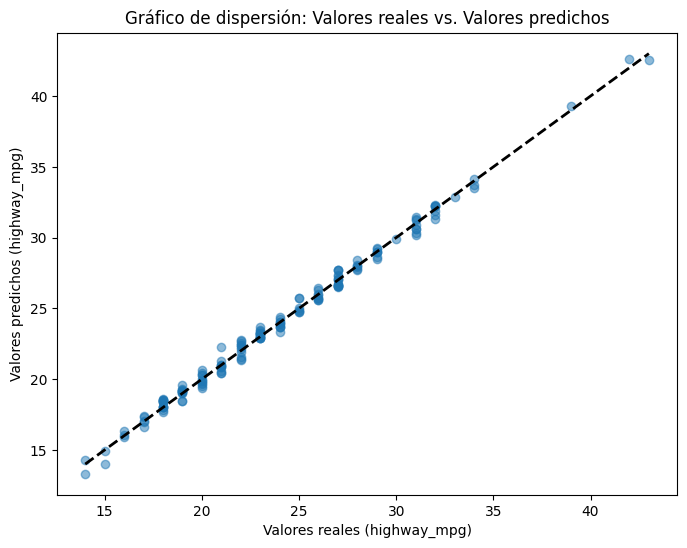

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores reales (highway_mpg)")
plt.ylabel("Valores predichos (highway_mpg)")
plt.title("Gráfico de dispersión: Valores reales vs. Valores predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia
plt.show()

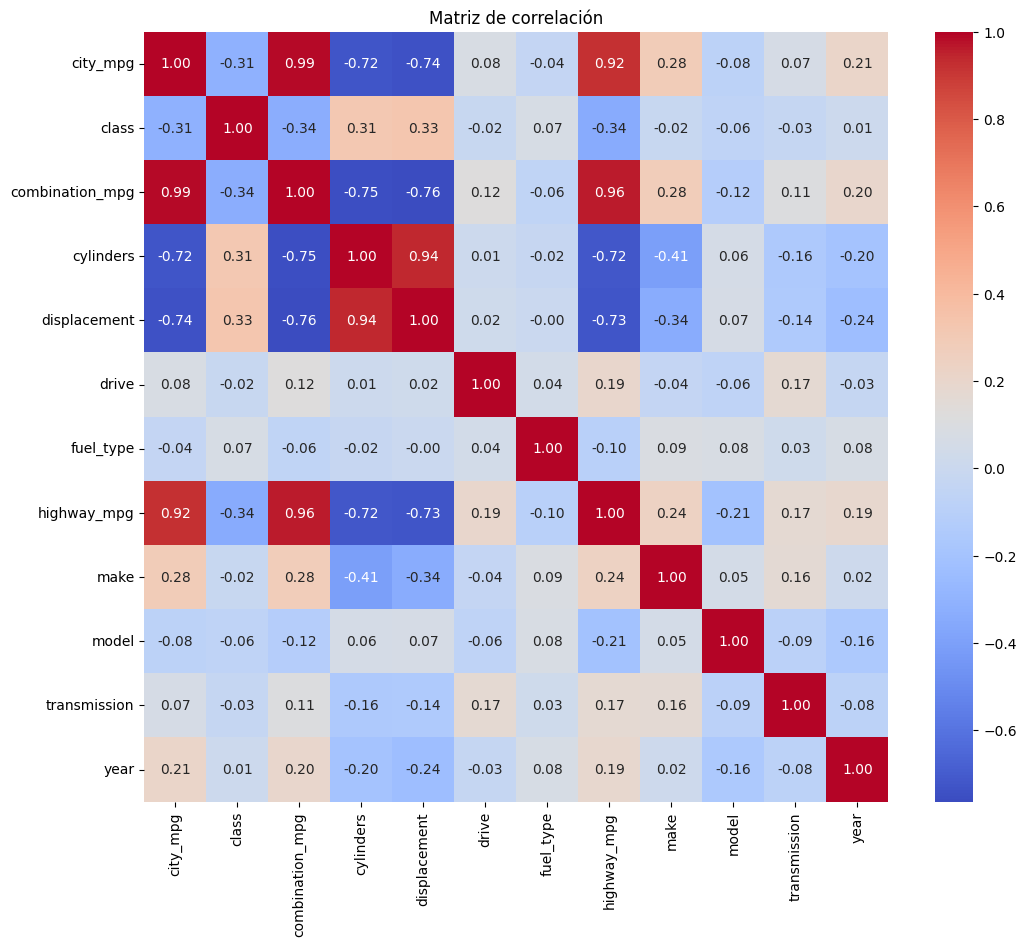

In [17]:
# prompt: hacer un hotmap

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

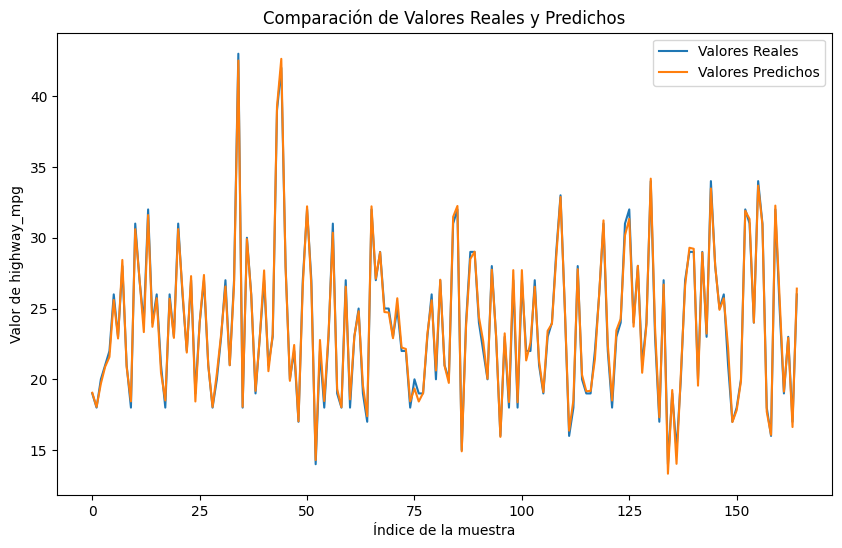

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reales')
plt.plot(y_pred, label='Valores Predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Valor de highway_mpg')
plt.title('Comparación de Valores Reales y Predichos')
plt.legend()
plt.show()

In [ ]:
#agrupar para conocer que tan costoso puede ser

In [32]:
# Usar K-Means para agrupar los datos
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

clusters = kmeans.labels_

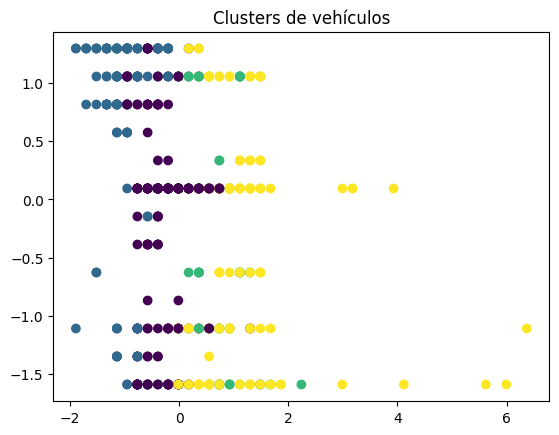

In [30]:
# Visualización simple
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters de vehículos")
plt.show()

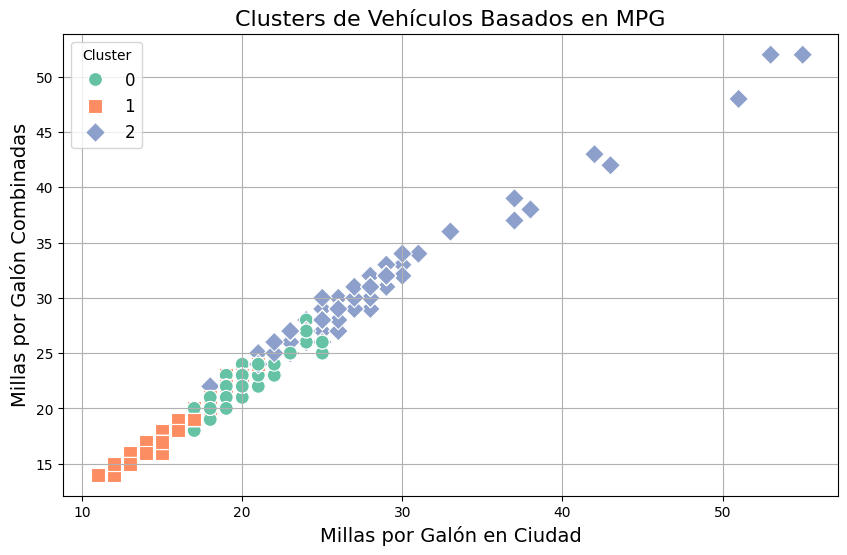

In [31]:
# Crear un DataFrame para incluir los clusters
X['combination_mpg'] = df['combination_mpg']

# Visualización mejorada con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='city_mpg', y='combination_mpg', hue='Cluster', palette='Set2', style='Cluster', s=100, markers=["o", "s", "D"])
plt.title('Clusters de Vehículos Basados en MPG', fontsize=16)
plt.xlabel('Millas por Galón en Ciudad', fontsize=14)
plt.ylabel('Millas por Galón Combinadas', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()